# Analyse der Verkaufszahlen von Solarmodulen

In diesem Notebook analysieren wir die Preisentwicklung von Solarmodulen von 2019 bis 2024. Wir verwenden eine CSV-Datei, die verschiedene Module, Hersteller, Leistungskapazitäten, Mengen und Preise enthält. Ziel ist die Analyse und Visualisierung von Preisveränderungen.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## CSV-Datei einlesen und anzeigen

In [41]:
data = pd.read_csv('data/verkauf-solarmodule.csv')
print(data.head())

        Datum          Modellname Hersteller  Leistung  Menge  Einzelpreis  \
0  09.01.2019  Aiko SunPower 440X       Aiko       440      4       209.96   
1  09.01.2019       JA Solar 430M   JA Solar       430     10       204.89   
2  20.01.2019    LONGi Hi-MO 450H      LONGi       450      7       200.92   
3  11.02.2019       SolarMax 410P    Tongwei       410      1       209.77   
4  13.02.2019    LONGi Hi-MO 450H      LONGi       450     15       203.84   

   Gesamtpreis  
0       839.83  
1      2048.92  
2      1406.45  
3       209.77  
4      3057.66  


## Datenbereinigung und -vorbereitung

### Überprüfen auf fehlende Werte

In [29]:
print(data.isnull().sum())

Datum          0
Modellname     0
Hersteller     0
Leistung       0
Menge          0
Einzelpreis    0
Gesamtpreis    0
dtype: int64


### Konvertierung des Datums in datetime-Format

In [30]:

data['Datum'] = pd.to_datetime(data['Datum'], format='%d.%m.%Y')

In [31]:
## Explorative Datenanalyse (EDA)

### Grundlegende Statistiken
data.describe()

,Datum,Leistung,Menge,Einzelpreis,Gesamtpreis
count,400,400.000000,400.000000,400.000000,400.000000
mean,2022-01-09 00:18:00.000000256,432.550000,10.750000,121.486025,1313.829950
min,2019-01-09 00:00:00,410.000000,1.000000,39.930000,40.030000
25%,2020-05-18 12:00:00,410.000000,6.000000,73.195000,513.572500
50%,2021-12-21 12:00:00,440.000000,11.000000,131.115000,1128.970000
75%,2023-10-03 06:00:00,440.000000,16.000000,172.005000,1960.402500
max,2024-12-28 00:00:00,450.000000,20.000000,209.960000,4118.390000
std,NaN,14.850888,5.788027,56.766921,982.315033


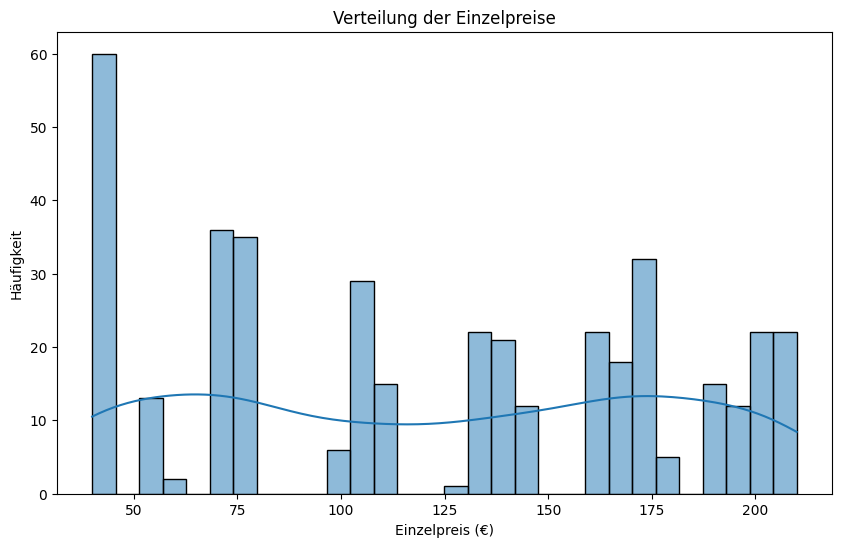

In [42]:
### Verteilung der Preise

plt.figure(figsize=(10, 6))
sns.histplot(data['Einzelpreis'], bins=30, kde=True)
plt.title('Verteilung der Einzelpreise')
plt.xlabel('Einzelpreis (€)')
plt.ylabel('Häufigkeit')
plt.show()

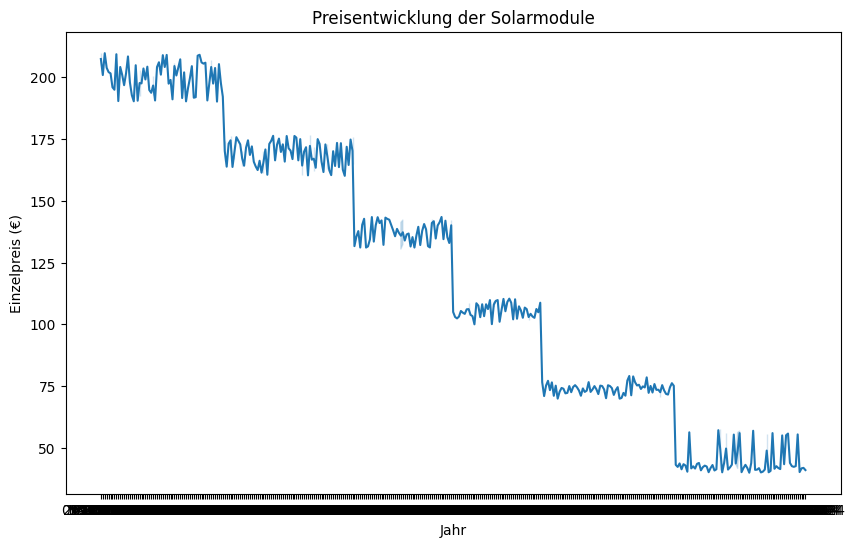

In [43]:
## Visualisierung der Preisentwicklung

### Liniendiagramm der Preisentwicklung

plt.figure(figsize=(10, 6))
sns.lineplot(x='Datum', y='Einzelpreis', data=data)
plt.title('Preisentwicklung der Solarmodule')
plt.xlabel('Jahr')
plt.ylabel('Einzelpreis (€)')
plt.show()


In [37]:
## Analyse der Preisentwicklung

### Durchschnittliche jährliche Preisänderung
data['Jahr'] = data['Datum'].dt.year
average_price_per_year = data.groupby('Jahr')['Einzelpreis'].mean()
print(average_price_per_year.diff())

Jahr
2019          NaN
2020   -31.429477
2021   -31.515893
2022   -31.824250
2023   -31.935451
2024   -31.757416
Name: Einzelpreis, dtype: float64


In [44]:

## Vergleich der Hersteller

### Durchschnittspreis pro Hersteller

average_price_by_manufacturer = data.groupby('Hersteller')['Einzelpreis'].mean()
print(average_price_by_manufacturer)

Hersteller
Aiko        123.267736
JA Solar    120.782447
LONGi       131.266869
Tongwei     112.960990
Name: Einzelpreis, dtype: float64


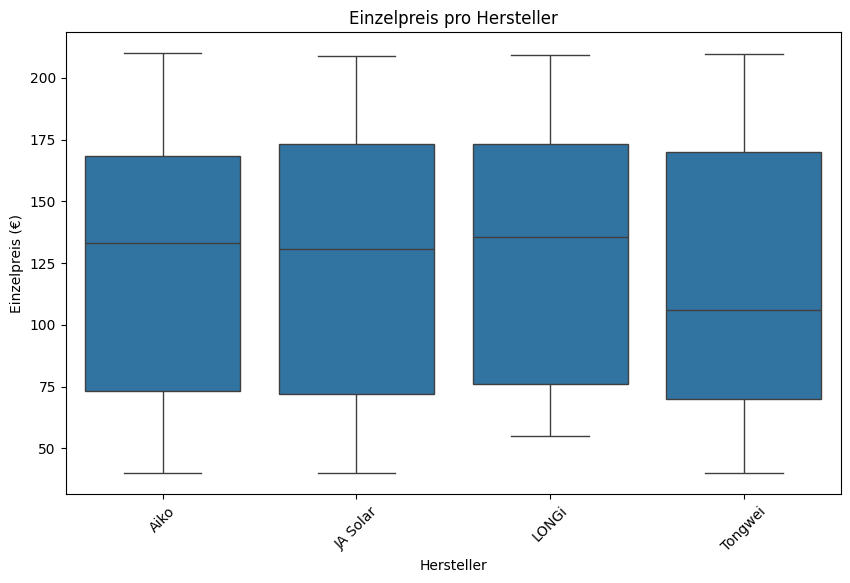

In [ ]:

### Preise pro Hersteller

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hersteller', y='Einzelpreis', data=data)
plt.title('Einzelpreis pro Hersteller')
plt.xlabel('Hersteller')
plt.ylabel('Einzelpreis (€)')
plt.xticks(rotation=45)
plt.show()

